## DataAnalysis of the Djinni vacancies for language Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

## Task 1. Get all tables from database

In [2]:
with sqlite3.connect("../djinni.db") as conn:
    cursor = conn.cursor()
    cursor.execute("""SELECT name FROM sqlite_master
      WHERE type='table';""")
    list_of_tables = cursor.fetchall()
    for table in list_of_tables:
        df = pd.read_sql(f"SELECT * FROM {table[0]}", conn, index_col=None)
        df.to_csv(f"{table[0]}.csv", index=False)

# Save tables to a variable

In [3]:
frameworks = pd.read_csv("framework.csv")
vacancy = pd.read_csv("vacancy.csv")
join_tables = pd.read_csv("vacancy_technologies.csv")

# Merge tables

In [4]:
merge_tabs = pd.merge(left=frameworks, right=join_tables, how="left", left_on="id", right_on="framework_id")
merge_tabs1 = pd.merge(left=merge_tabs, right=vacancy, how="right", left_on="vacancy_id", right_on="id")
merge_tabs1.drop("id_x", inplace=True, axis=1)
merge_tabs1.drop("id_y", inplace=True, axis=1)
merge_tabs1

,framework_name,framework_id,vacancy_id,vacancy_name,experience,lvl,views,applications,part_of_url
0,python,1.0,1.0,developer,0,junior,1296,293,https://djinni.co/jobs/431369-stazher-js-pytho...
1,js,2.0,1.0,developer,0,junior,1296,293,https://djinni.co/jobs/431369-stazher-js-pytho...
2,python,1.0,2.0,engineer,0,junior,1119,297,https://djinni.co/jobs/512545-python-engineer-...
3,flask,3.0,2.0,engineer,0,junior,1119,297,https://djinni.co/jobs/512545-python-engineer-...
4,sql,4.0,2.0,engineer,0,junior,1119,297,https://djinni.co/jobs/512545-python-engineer-...
...,...,...,...,...,...,...,...,...,...
2492,python,1.0,345.0,backend lead team,5,senior,36,2,https://djinni.co/jobs/504063-backend-team-lea...
2493,api,6.0,345.0,backend lead team,5,senior,36,2,https://djinni.co/jobs/504063-backend-team-lea...
2494,django,7.0,345.0,backend lead team,5,senior,36,2,https://djinni.co/jobs/504063-backend-team-lea...
2495,rest,20.0,345.0,backend lead team,5,senior,36,2,https://djinni.co/jobs/504063-backend-team-lea...


In [5]:
nan_df = merge_tabs1[merge_tabs1.isna().any(axis=1)]
merge_tabs1.dropna(how="any")

,framework_name,framework_id,vacancy_id,vacancy_name,experience,lvl,views,applications,part_of_url
0,python,1.0,1.0,developer,0,junior,1296,293,https://djinni.co/jobs/431369-stazher-js-pytho...
1,js,2.0,1.0,developer,0,junior,1296,293,https://djinni.co/jobs/431369-stazher-js-pytho...
2,python,1.0,2.0,engineer,0,junior,1119,297,https://djinni.co/jobs/512545-python-engineer-...
3,flask,3.0,2.0,engineer,0,junior,1119,297,https://djinni.co/jobs/512545-python-engineer-...
4,sql,4.0,2.0,engineer,0,junior,1119,297,https://djinni.co/jobs/512545-python-engineer-...
...,...,...,...,...,...,...,...,...,...
2492,python,1.0,345.0,backend lead team,5,senior,36,2,https://djinni.co/jobs/504063-backend-team-lea...
2493,api,6.0,345.0,backend lead team,5,senior,36,2,https://djinni.co/jobs/504063-backend-team-lea...
2494,django,7.0,345.0,backend lead team,5,senior,36,2,https://djinni.co/jobs/504063-backend-team-lea...
2495,rest,20.0,345.0,backend lead team,5,senior,36,2,https://djinni.co/jobs/504063-backend-team-lea...


# Make columns vacancy_id and framework_id as integer !

In [6]:
merge_tabs1 = merge_tabs1.fillna(0)
merge_tabs1.vacancy_id = merge_tabs1.vacancy_id.astype("int32")
merge_tabs1.framework_id = merge_tabs1.framework_id.astype("int32")
merge_tabs1

,framework_name,framework_id,vacancy_id,vacancy_name,experience,lvl,views,applications,part_of_url
0,python,1,1,developer,0,junior,1296,293,https://djinni.co/jobs/431369-stazher-js-pytho...
1,js,2,1,developer,0,junior,1296,293,https://djinni.co/jobs/431369-stazher-js-pytho...
2,python,1,2,engineer,0,junior,1119,297,https://djinni.co/jobs/512545-python-engineer-...
3,flask,3,2,engineer,0,junior,1119,297,https://djinni.co/jobs/512545-python-engineer-...
4,sql,4,2,engineer,0,junior,1119,297,https://djinni.co/jobs/512545-python-engineer-...
...,...,...,...,...,...,...,...,...,...
2492,python,1,345,backend lead team,5,senior,36,2,https://djinni.co/jobs/504063-backend-team-lea...
2493,api,6,345,backend lead team,5,senior,36,2,https://djinni.co/jobs/504063-backend-team-lea...
2494,django,7,345,backend lead team,5,senior,36,2,https://djinni.co/jobs/504063-backend-team-lea...
2495,rest,20,345,backend lead team,5,senior,36,2,https://djinni.co/jobs/504063-backend-team-lea...


## Task 2. Display most popular frameworks in “middle” python programmers!

In [7]:
middle = merge_tabs1[merge_tabs1["lvl"] == "middle"]
partly = middle.groupby(["framework_name"], as_index = False).count()
partly.sort_values(by="framework_id", ascending=False)

,framework_name,framework_id,vacancy_id,vacancy_name,experience,lvl,views,applications,part_of_url
37,python,66,66,66,66,66,66,66,66
11,docker,37,37,37,37,37,37,37,37
10,django,32,32,32,32,32,32,32,32
40,redis,27,27,27,27,27,27,27,27
35,postgresql,27,27,27,27,27,27,27,27
17,git,26,26,26,26,26,26,26,26
3,api,23,23,23,23,23,23,23,23
15,flask,20,20,20,20,20,20,20,20
41,rest,19,19,19,19,19,19,19,19
43,sql,18,18,18,18,18,18,18,18


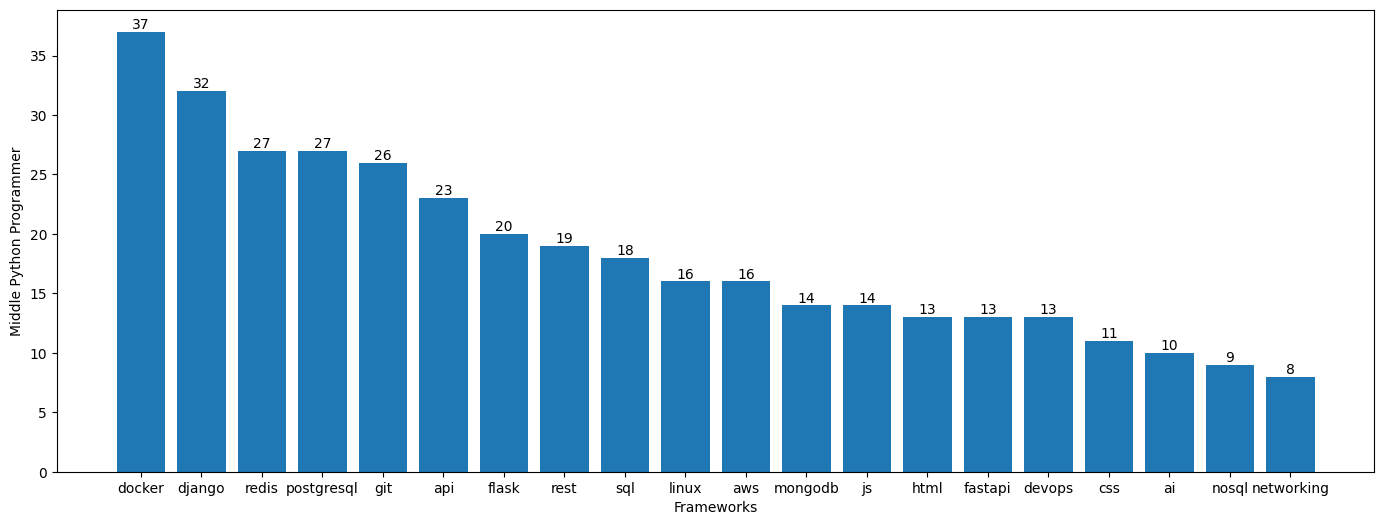

In [8]:
plt.rcParams["figure.figsize"] = (17, 6)
top_20_fw = partly.sort_values("framework_id", ascending=False)[1:21]
frameworks = top_20_fw["framework_name"]
popularity = top_20_fw["framework_id"]
barplot = plt.bar(x=frameworks, height=popularity)
plt.bar_label(barplot, labels=popularity, label_type="edge")
plt.ylabel("Middle Python Programmer")
plt.xlabel("Frameworks")
plt.show()

## Task 3. Display most popular frameworks in "junior" python programmers!

In [9]:
junior = merge_tabs1[merge_tabs1["lvl"] == "junior"]
a = junior.groupby(["framework_name"], as_index = False).count()
a.sort_values(by="framework_id", ascending=False)

,framework_name,framework_id,vacancy_id,vacancy_name,experience,lvl,views,applications,part_of_url
34,python,22,22,22,22,22,22,22,22
3,api,9,9,9,9,9,9,9,9
15,git,9,9,9,9,9,9,9,9
10,django,9,9,9,9,9,9,9,9
13,flask,7,7,7,7,7,7,7,7
11,docker,7,7,7,7,7,7,7,7
40,sql,7,7,7,7,7,7,7,7
19,js,7,7,7,7,7,7,7,7
17,javascript,7,7,7,7,7,7,7,7
32,postgresql,6,6,6,6,6,6,6,6


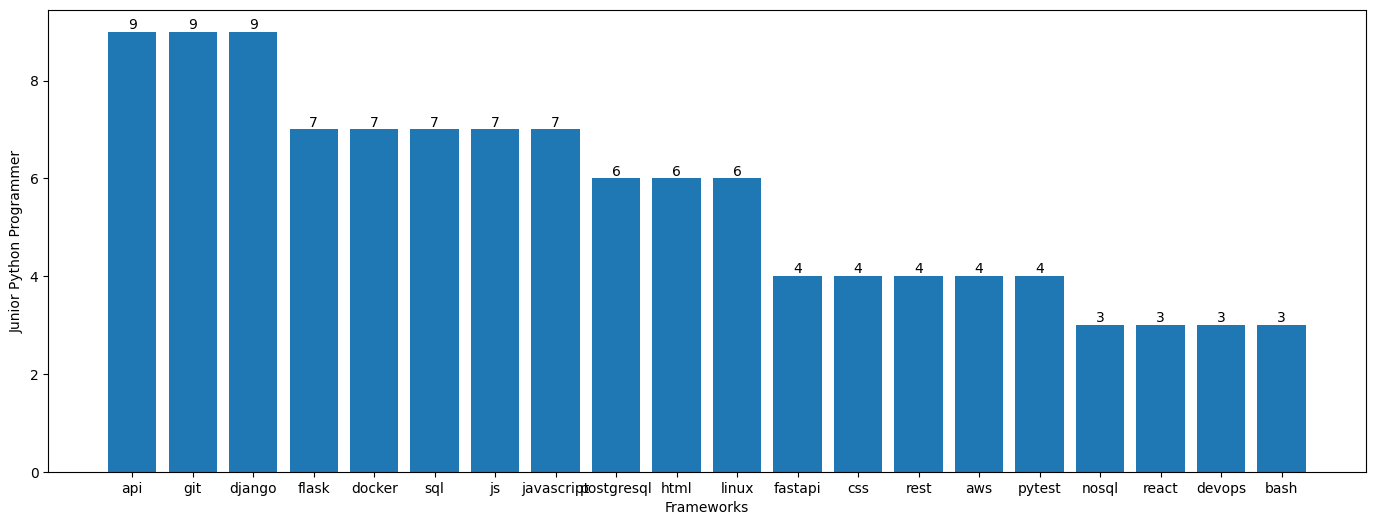

In [10]:
plt.rcParams["figure.figsize"] = (17, 6)
top_20_fw = a.sort_values("framework_id", ascending=False)[1:21]
frameworks = top_20_fw["framework_name"]
popularity = top_20_fw["framework_id"]
barplot = plt.bar(x=frameworks, height=popularity)
plt.bar_label(barplot, labels=popularity, label_type="edge")
plt.ylabel("Junior Python Programmer")
plt.xlabel("Frameworks")
plt.show()

## Task 4 Lets look for most popular frameworks in "senior" python programmers!

In [11]:
senior = merge_tabs1[merge_tabs1["lvl"] == "senior"]
b = senior.groupby(["framework_name"], as_index = False).count()
b.sort_values(by="framework_id", ascending=False)

,framework_name,framework_id,vacancy_id,vacancy_name,experience,lvl,views,applications,part_of_url
40,python,99,99,99,99,99,99,99,99
6,aws,67,67,67,67,67,67,67,67
11,docker,50,50,50,50,50,50,50,50
38,postgresql,32,32,32,32,32,32,32,32
10,django,32,32,32,32,32,32,32,32
1,ai,31,31,31,31,31,31,31,31
9,devops,30,30,30,30,30,30,30,30
2,algorithms,29,29,29,29,29,29,29,29
4,api,27,27,27,27,27,27,27,27
44,rest,25,25,25,25,25,25,25,25


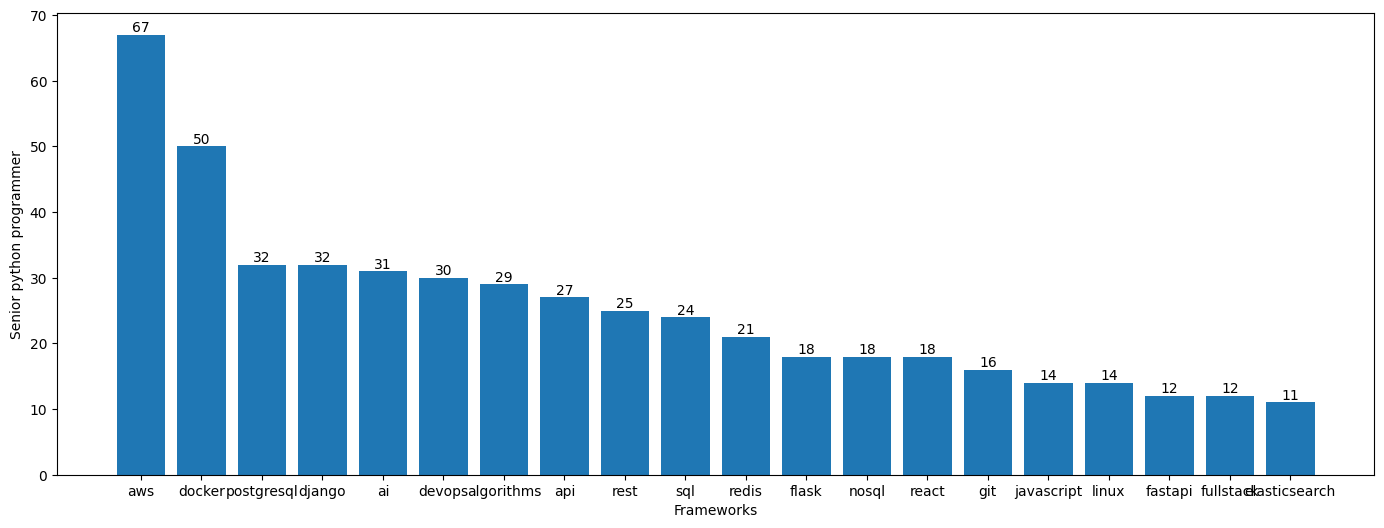

In [12]:
plt.rcParams["figure.figsize"] = (17, 6)
top_20_fw = b.sort_values("framework_id", ascending=False)[1:21]
frameworks = top_20_fw["framework_name"]
popularity = top_20_fw["framework_id"]
barplot = plt.bar(x=frameworks, height=popularity)
plt.bar_label(barplot, labels=popularity, label_type="edge")
plt.ylabel("Senior python programmer")
plt.xlabel("Frameworks")
plt.show()

## Task 5. Which specialists are more in demand?

In [13]:
junior_tab = merge_tabs1[merge_tabs1["lvl"] == "junior"].mean()
amount_jun = len(merge_tabs1[merge_tabs1["lvl"] == "junior"].groupby("vacancy_id").count())
middle_tab = merge_tabs1[merge_tabs1["lvl"] == "middle"].mean()
amount_middle = len(merge_tabs1[merge_tabs1["lvl"] == "middle"].groupby("vacancy_id").count())
mid_sen_tab = merge_tabs1[merge_tabs1["lvl"] == "middle/senior"].mean()
mid_sen_amount = len(merge_tabs1[merge_tabs1["lvl"] == "middle/senior"].groupby("vacancy_id").count())
senior_tab = merge_tabs1[(merge_tabs1["lvl"] == "senior")].mean()
amount_senior = len(merge_tabs1[merge_tabs1["lvl"] == "senior"].groupby("vacancy_id"))

C:\Users\Igor\AppData\Local\Temp\ipykernel_33652\1368471084.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  junior_tab = merge_tabs1[merge_tabs1["lvl"] == "junior"].mean()
C:\Users\Igor\AppData\Local\Temp\ipykernel_33652\1368471084.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  middle_tab = merge_tabs1[merge_tabs1["lvl"] == "middle"].mean()
C:\Users\Igor\AppData\Local\Temp\ipykernel_33652\1368471084.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default

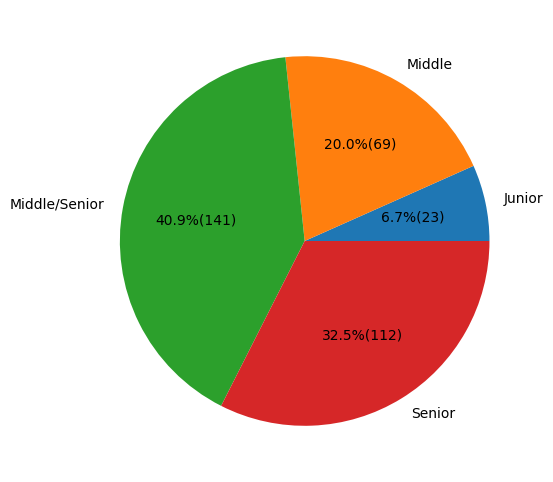

In [14]:
y = np.array([amount_jun, amount_middle, mid_sen_amount, amount_senior])
my_label = ["Junior", "Middle", "Middle/Senior", "Senior"]
plt.pie(y, labels=my_label,autopct=lambda p:f'{p:.1f}%({p*sum(y)/100:.0f})')
plt.show()

## Difference between lvl vacancy, views, applications for every python lvl!

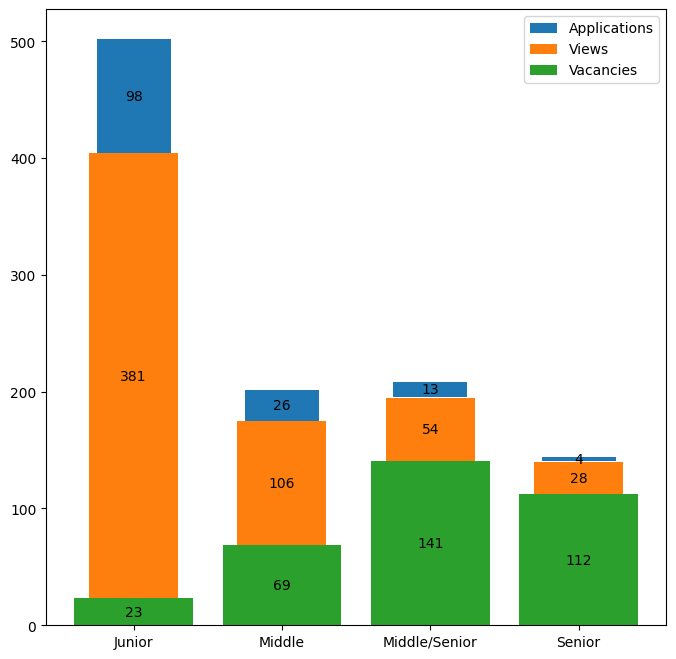

In [15]:
top = np.array([junior_tab.applications, middle_tab.applications, mid_sen_tab.applications, senior_tab.applications])
mid = np.array([junior_tab.views, middle_tab.views, mid_sen_tab.views, senior_tab.views])
low = np.array([amount_jun, amount_middle, mid_sen_amount, amount_senior])
x_label = ["Junior", "Middle", "Middle/Senior", "Senior"]
plt.rcParams["figure.figsize"] = (8, 8)
a = plt.bar(x=x_label, height=top.round(), bottom=mid+low, width=0.5)
b = plt.bar(x=x_label, height=mid.round(), bottom=low, label="views", width=0.6)
c = plt.bar(x=x_label, height=low.round(), label="vacancies", width=0.8)
plt.legend(["Applications", "Views", "Vacancies"])
plt.bar_label(c, label_type="center", color="black")
plt.bar_label(b, label_type="center", color="black")
plt.bar_label(a, label_type="center", color="black")
plt.show()

In [16]:
asd = merge_tabs1[merge_tabs1["vacancy_name"].str.contains("backend")]
asd

,framework_name,framework_id,vacancy_id,vacancy_name,experience,lvl,views,applications,part_of_url
8,python,1,3,backend developer,0,junior,1775,497,https://djinni.co/jobs/514025-junior-backend-d...
9,api,6,3,backend developer,0,junior,1775,497,https://djinni.co/jobs/514025-junior-backend-d...
10,selenium,8,3,backend developer,0,junior,1775,497,https://djinni.co/jobs/514025-junior-backend-d...
11,css,9,3,backend developer,0,junior,1775,497,https://djinni.co/jobs/514025-junior-backend-d...
12,aws,10,3,backend developer,0,junior,1775,497,https://djinni.co/jobs/514025-junior-backend-d...
...,...,...,...,...,...,...,...,...,...
2492,python,1,345,backend lead team,5,senior,36,2,https://djinni.co/jobs/504063-backend-team-lea...
2493,api,6,345,backend lead team,5,senior,36,2,https://djinni.co/jobs/504063-backend-team-lea...
2494,django,7,345,backend lead team,5,senior,36,2,https://djinni.co/jobs/504063-backend-team-lea...
2495,rest,20,345,backend lead team,5,senior,36,2,https://djinni.co/jobs/504063-backend-team-lea...


## Let's find different between popularity of frameworks in different vacancies!

In [17]:
engineer = merge_tabs1[merge_tabs1["vacancy_name"].str.startswith("engineer") | (merge_tabs1["vacancy_name"].str.endswith("engineer"))][:300]
engineer = engineer.groupby("framework_name", as_index=False).count()
engineer = engineer.sort_values("framework_id", ascending=False)
engineer = engineer[["framework_name", "framework_id"]]
developer = merge_tabs1[merge_tabs1["vacancy_name"].str.endswith("developer") & (merge_tabs1["vacancy_name"].str.startswith("developer"))][:300]
developer = developer.groupby("framework_name", as_index=False).count()
developer = developer.sort_values("framework_id", ascending=False)
developer = developer[["framework_name", "framework_id"]]
backend = merge_tabs1[merge_tabs1["vacancy_name"].str.contains("backend")]
backend = backend.groupby("framework_name", as_index=False).count()
backend = backend.sort_values("framework_id", ascending=False)
backend = backend[["framework_name", "framework_id"]]
backend = backend[1:]
backend

,framework_name,framework_id
6,aws,29
11,docker,28
4,api,19
1,ai,17
38,redis,16
39,rest,15
10,django,13
42,sql,13
17,git,12
2,algorithms,11


In [18]:
developer["framework_id"] = (developer["framework_id"]).round().astype("int32")
developer = developer[1:]
developer

,framework_name,framework_id
10,django,22
33,postgresql,18
17,git,17
11,docker,17
23,linux,14
3,api,13
15,flask,13
37,redis,11
40,sql,10
5,aws,10


In [19]:
engineer = engineer[1:]
engineer

,framework_name,framework_id
3,api,15
10,docker,15
9,django,14
5,aws,12
40,sql,11
31,postgresql,11
35,react,10
0,ai,9
16,git,9
36,redis,9


In [20]:
df1 = pd.merge(backend,engineer, how="inner", left_on=["framework_name"], right_on=["framework_name"])
df1 = pd.merge(df1, developer, how="inner", left_on=["framework_name"], right_on=["framework_name"])
df1.rename(columns={"framework_id_x": "backend", "framework_id_y": "engineer", "framework_id": "developer"}, inplace=True)
df1 = df1[:15]
df1

,framework_name,backend,engineer,developer
0,aws,29,12,10
1,docker,28,15,17
2,api,19,15,13
3,ai,17,9,2
4,redis,16,9,11
5,rest,15,8,10
6,django,13,14,22
7,sql,13,11,10
8,git,12,9,17
9,algorithms,11,6,2


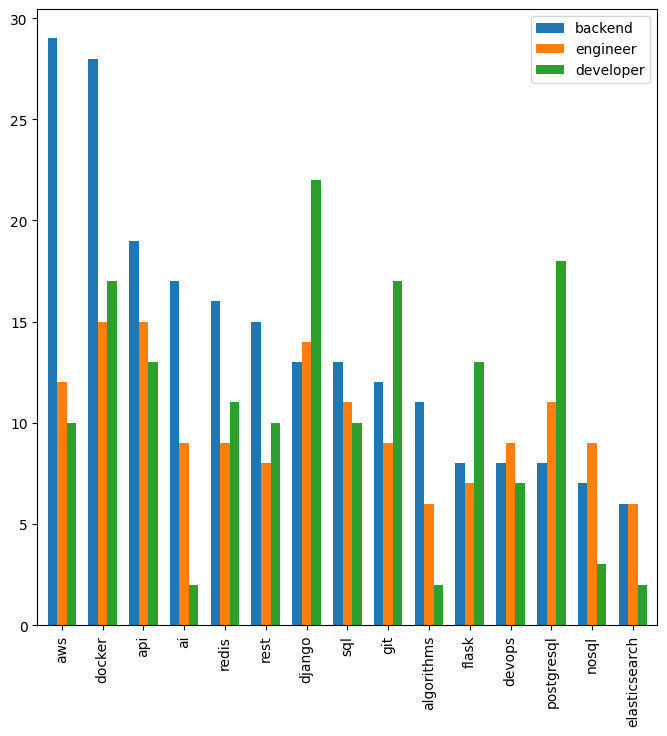

In [21]:
x = np.array(df1.framework_name)
x_axis = np.arange(len(df1.framework_name))
df1.plot.bar(width=0.7)
plt.xticks(x_axis, x)
plt.show()